In [424]:
%matplotlib inline

In [425]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tqdm.notebook import tqdm

plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["axes.formatter.limits"] = (0.7, 1)
sns.set_theme()

In [426]:
[i for i in plt.rcParams.keys() if 'lim' in i]

['animation.embed_limit', 'axes.autolimit_mode', 'axes.formatter.limits']

Загрузите датасет breast_cancer.

In [427]:
X, y = load_breast_cancer(return_X_y=True)

In [428]:
y[:10], X.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), (569, 30))

Выберите два первых признака. Таким образом мы уменьшим размерность задачи. У нас была задача множественной классификации, а стала - бинарная.

In [429]:
X = X[:, :2]
X.shape

(569, 2)

Разделите датасет на обучающую и тестовую выборки в пропорции 80-20.

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Постройте классификатор на опорных векторах с гауссовым ядром с параметром регуляризации C=0.01. Выведите на экран значение точности на тестовой и обучающей выборке. Сделайте предварительный вывод о степени обученности модели.


In [431]:
clf = SVC(kernel='rbf', C=0.01)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.6666666666666666
train accuracy: 0.6857142857142857


Невысокое значение `train_score` и близость значений `train_score` и `test_score` говорят о том, что модель недообучается.

Постройте графически зависимость тестовой и обучающей точности от размера обучающей выборки. Прокомментируйте получившийся результат. Сделайте вывод о том, недообучается или переобучается модель? В зависимости от этого выберите варианты, которые могут привести к увеличению точности модели (обычно подходит больше одного варианта):
1. собрать больше объектов наблюдения;
2. провести обучение на меньшем объеме данных;
3. исключить часть признаков из модели;
4. добавить новые признаки в модель;
5. добавить полиномиальные признаки;
6. попробовать более сложные модели;
7. попробовать более простые модели;
8. увеличить регуляризацию модели;
9. уменьшить регуляризацию модели;


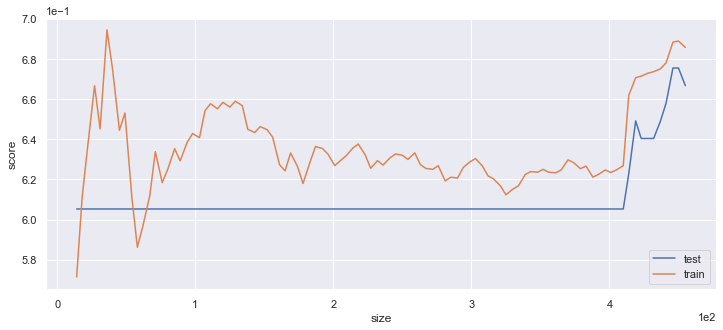

In [432]:
test_scores = []
train_scores = []
xi = np.linspace(len(X_train) // 100 + 10, len(X_train), 100, dtype=int)

for i in xi:
    clf = SVC(C=0.01, kernel='rbf')

    x_ = X_train[:i]
    y_ = y_train[:i]

    clf.fit(x_, y_)

    test_scores.append(clf.score(X_test, y_test))
    train_scores.append(clf.score(x_, y_))

ax = plt.axes()
ax.plot(xi, test_scores, label="test")
ax.plot(xi, train_scores, label="train")
ax.set_xlabel('size')
ax.set_ylabel('score')
_ = ax.legend()

И `train_score` и `test_score` с ростом объема обучающей выборке увеличиваются. Модель недообучается. Точность модели маленькая и на тестовых данных продолжает расти.

Способы улучшить модель:
- собрать больше объектов наблюдения (но в данном случае это не возможно)
- исключить и добавить новые признаки одновременно (выбрать признаки, которые, например, больше коррелируют с `target`)
- попробовать более сложные модели (например, MLP)
- увеличить регуляризацию модели (увеличение регуляризации модели помогает преодолеть недообучение)


Проверьте выдвинутую гипотезу и попробуйте улучшить модель в соответствии с выбранными рекомендациями. Проверьте, увеличивается ли тестовая точность. Сделайте вывод.

### Выбор признаков на основе корреляционной матрицы

In [433]:
X_, y_ = load_breast_cancer(return_X_y=True)
pd.concat([pd.Series(y_, name='target'), pd.DataFrame(X_)], axis=1).corr().abs().sort_values('target', ascending=False)

,target,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
27,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,...,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
22,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,0.219169,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
7,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
20,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,0.185728,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
2,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
23,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,0.177193,...,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
0,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
3,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
6,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930


Возьмем признаки с индексами 27 и 22

In [434]:
X_ = X_[:, [22, 27]]
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2)

In [435]:
clf = SVC(kernel='rbf', C=0.01)
clf.fit(X_train_, y_train_)
print(f'test accuracy: {clf.score(X_test_, y_test_)}')
print(f'train accuracy: {clf.score(X_train_, y_train_)}')

test accuracy: 0.7368421052631579
train accuracy: 0.7758241758241758


Точность увеличилась, но незначительно

### MLPClassifier

In [436]:
mlp = MLPClassifier(solver='lbfgs', activation='logistic', alpha=10.0, max_iter=1000)
mlp.fit(X_train, y_train)
print(f'test accuracy: {mlp.score(X_test, y_test)}')
print(f'train accuracy: {mlp.score(X_train, y_train)}')

test accuracy: 0.8859649122807017
train accuracy: 0.8879120879120879


MLP дал значительный прирост точности

### Увеличение регуляризации

In [437]:
clf = SVC(kernel='rbf', C=1)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.9035087719298246
train accuracy: 0.9142857142857143


Увеличение регуляризации также положительно влияет на точность модели

Повторите предыдущий пункт для различных значений C в диапазоне от 0,0001 до 1 000 000. Обратите внимание на шкалу по вертикальной оси. Для каких значений тестовая точность оптимальна? Какие значения дают недообучение? Какие - переобучение?

Постройте график зависимости тестовой и обучающей точности от значения регуляризационного параметра. Сделайте вывод о зависимости степени регуляризации на точность модели.


In [438]:
def var_regularization(xi, kernel):
    test_scores = []
    train_scores = []

    for i in tqdm(xi):
        clf = SVC(C=i, kernel=kernel)

        clf.fit(X_train, y_train)

        test_scores.append(clf.score(X_test, y_test))
        train_scores.append(clf.score(X_train, y_train))

    ax = plt.axes()
    ax.plot(xi, test_scores, label="test")
    ax.plot(xi, train_scores, label="train")
    ax.set_xlabel('С')
    ax.set_ylabel('score')
    ax.legend()
    return test_scores, train_scores

  0%|          | 0/50 [00:00<?, ?it/s]

0.9122807017543859

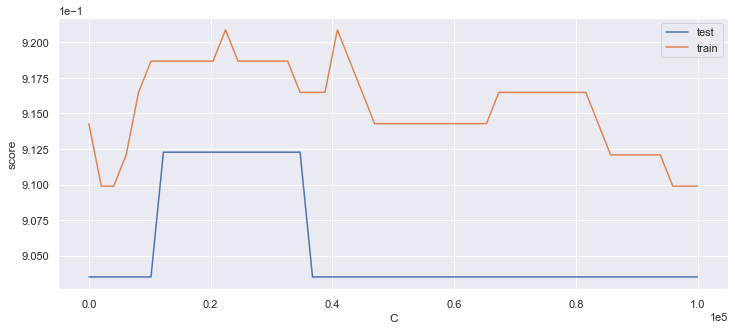

In [439]:
test_scores, _ = var_regularization(np.linspace(1, 100_000, 50), 'rbf')
max(test_scores)

  0%|          | 0/500 [00:00<?, ?it/s]

0.9122807017543859

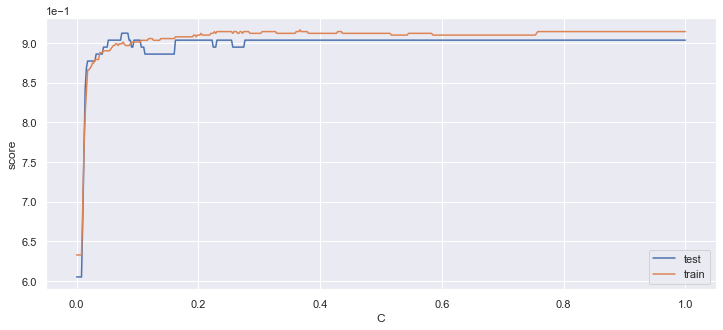

In [440]:
test_scores, _ = var_regularization(np.linspace(0.0001, 1, 500), 'rbf')
max(test_scores)

С большим значением $ C $ модель переобучается, а с малым - недообучается. С увеличением параметра регуляризации $ C $ точность модели на тренировочных данных увеличивается, а на тестовых - падает.

Найдите методом подбора оптимальное значение параметра регуляризации (примерное).

  0%|          | 0/100 [00:00<?, ?it/s]

0.9035087719298246

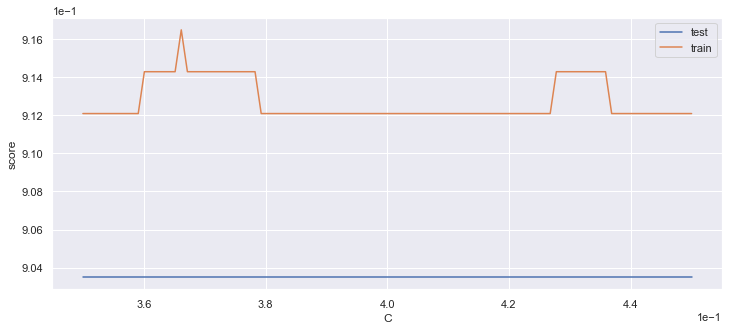

In [441]:
# эмпирически сужаем самый левый промежуток с разумным максимумом
test_scores, _ = var_regularization(np.linspace(0.35, 0.45, 100), 'rbf')
max(test_scores)

In [442]:
clf = SVC(kernel='rbf', C=0.4)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.9035087719298246
train accuracy: 0.9120879120879121


При $ C = 0.4 $ получается достичь неплохой точности модели.

Повторите два предыдущих пункта для метода опорных векторов с линейным ядром. Сравните получившиеся результаты. Сделайте вывод о сравнительной эффективности двух этих моделей.


  0%|          | 0/50 [00:00<?, ?it/s]

0.9035087719298246

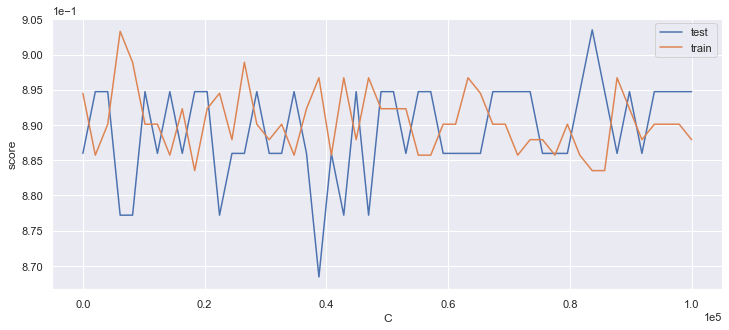

In [443]:
test_scores, _ = var_regularization(np.linspace(1, 100_000, 50), 'linear')
max(test_scores)

  0%|          | 0/200 [00:00<?, ?it/s]

0.8859649122807017

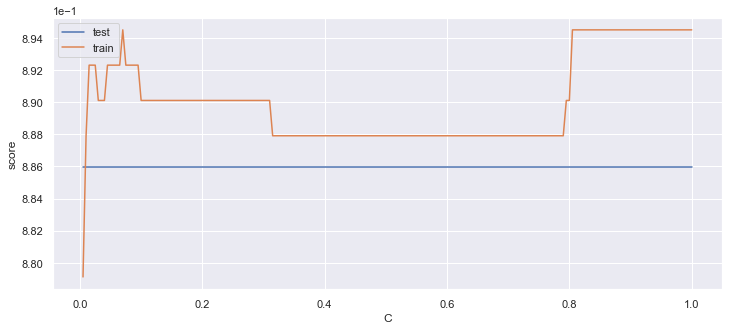

In [444]:
# эмпирически сужаем самый левый промежуток с разумным максимумом
test_scores, _ = var_regularization(np.linspace(0.005, 1, 200), 'linear')
max(test_scores)

In [445]:
clf = SVC(kernel='linear', C=0.3)
clf.fit(X_train, y_train)
print(f'test accuracy: {clf.score(X_test, y_test)}')
print(f'train accuracy: {clf.score(X_train, y_train)}')

test accuracy: 0.8859649122807017
train accuracy: 0.8901098901098901


In [446]:
%%timeit

clf = SVC(kernel='rbf', C=1_000)
clf.fit(X_train, y_train)

45 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [447]:
%%timeit

clf = SVC(kernel='linear', C=1_000)
clf.fit(X_train, y_train)

638 ms ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Вывод

Модели примерно одинаковые. Зато при большом значении параметра регуляризации fit time модели с ядром `rbf` гораздо лучше.